<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [47]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [56]:
df.to_csv( "m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

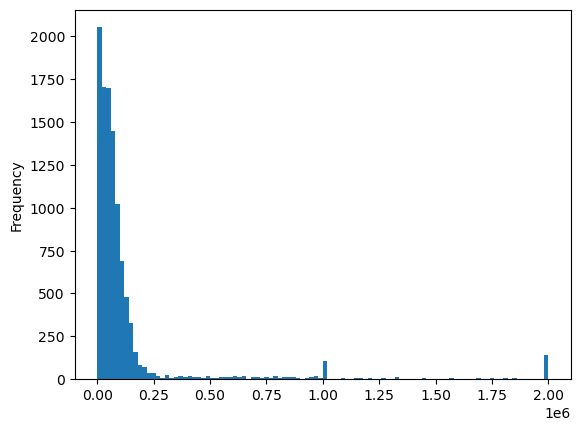

In [48]:
df['ConvertedComp'].plot(kind='hist', bins = 100)
#So many outliers!  Can I get rid of them>?

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

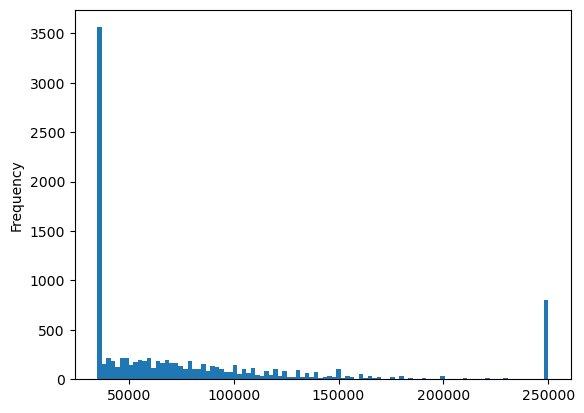

In [32]:
# Clip values
df['ConvertedComp'] = df['ConvertedComp'].clip(lower=25000, upper=250000)

# Create new DataFrame with clipped values and all other columns
df_new = df.copy()

df_new['ConvertedComp'].plot(kind='hist', bins = 100)


In [49]:
print(df['ConvertedComp'].isna().sum())

816


In [51]:
pd.options.display.max_rows = 12000
#print(df['ConvertedComp'].value_counts())

What is the median of the column `ConvertedComp`?


In [52]:
# your code goes here
print(df['ConvertedComp'].median())

57745.0


How many responders identified themselves only as a **Man**?


In [57]:
# your code goes here
print(df['Gender'].value_counts())

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [65]:
WomanSalaries = df.loc[df["Gender"] == "Woman", "ConvertedComp"]
print(WomanSalaries.median())
#print(WomanSalaries)

57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [76]:
# your code goes here
#min,q1,median,q3,max of a column are its five number summary.
print("The Five Number Summary of Age")
print("Min:    ", df["Age"].min())
print("Q1:     ", df["Age"].quantile(.25))
print("Median: ", df["Age"].median())
print("Q3:     ", df["Age"].quantile(.75))
print("Max:    ", df["Age"].max())

The Five Number Summary of Age
Min:     16.0
Q1:      25.0
Median:  29.0
Q3:      35.0
Max:     99.0


<AxesSubplot:>

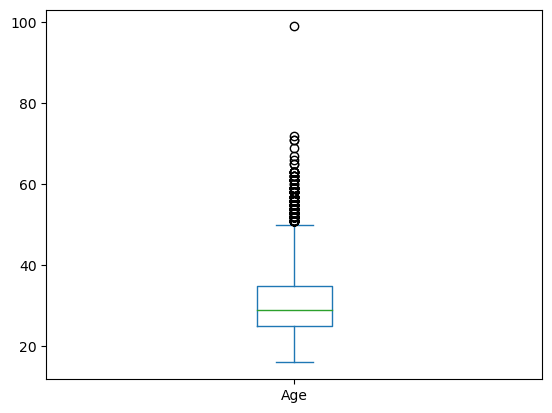

In [157]:
df['Age'].plot(kind='box')

Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

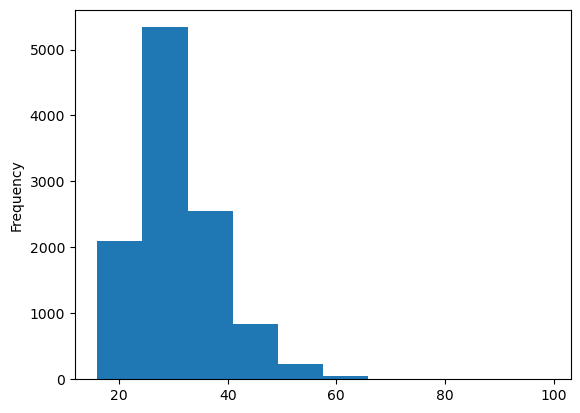

In [79]:
# your code goes here
df['Age'].plot( kind='hist')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

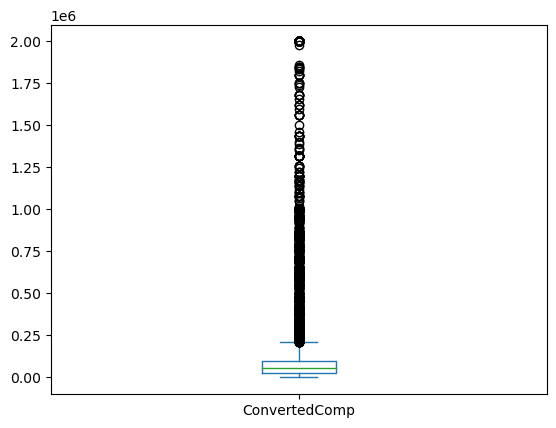

In [80]:
# your code goes here
df['ConvertedComp'].plot(kind='box')
#There are tons of outliers because of the issue with the salary inputs noted earlier
#Most likely people put their yearly salary into the survey, and then interpreted the 
#question of how often paid as how often they got their paycheck.  Because I am 
#thinking that most software developers don't make over a million dollars a year - unles they own a company!?!

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [93]:
Q1 = df['ConvertedComp'].quantile(.25)
Q3 = df['ConvertedComp'].quantile(.75)
IQR = Q3-Q1
print("Q1 : ", Q1)
print("Q3 : ", Q3)
print("IQR: ", IQR)

Q1 :  26868.0
Q3 :  100000.0
IQR:  73132.0


Find out the upper and lower bounds.


In [96]:
# your code goes here
print("Upper and Lower Bounds of Salary")
print("Upper = Q3 + (1.5) * IQR")
upperBound=Q3 + (1.5) * IQR
print("Lower = Q1 - (1.5) * IQR") 
lowerBound=Q1 - (1.5) * IQR
print("Upper: ", upperBound)
print("Lower: ", lowerBound)
print("Shows the issue on bad data with such extreme outliers, so a large negative lower bound")

Upper and Lower Bounds of Salary
Upper = Q3 + (1.5) * IQR
Lower = Q1 - (1.5) * IQR
Upper:  209698.0
Lower:  -82830.0
Shows the issue on bad data with such extreme outliers, so a large negative lower bound


Identify how many outliers are there in the `ConvertedComp` column.


In [111]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lowerBound) | (df['ConvertedComp'] > upperBound)]
[row,col] = outliers.shape
print("Number of outliers: ", row)

Number of outliers:  879


In [110]:
print(outliers.index)
print(outliers.shape)

(879, 85)


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [107]:
# your code goes here
# drop rows containing outliers
df_new = df.drop(outliers.index)

In [108]:
df_new.shape

(10519, 85)

In [109]:
df.shape

(11398, 85)

In [113]:
print( "The number of outliers is: ", 11398-10519)

The number of outliers is:  879


In [156]:
print(df_new['ConvertedComp'].median())

52704.0


In [158]:
print(df_new['ConvertedComp'].mean())

59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [124]:
import numpy as np
# your code goes here
df_numeric = df_new.select_dtypes(np.number)
#df_numeric.shape
df_numeric.columns

Index(['Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs',
       'Age'],
      dtype='object')

In [126]:
df_numeric.dtypes

Respondent         int64
CompTotal        float64
ConvertedComp    float64
WorkWeekHrs      float64
CodeRevHrs       float64
Age              float64
dtype: object

<H3>FYI -- Relevant numerical columns are ConvertedComp and WorkWeekHrs</H3>
because respondent is basically randomly assigned based on when took survey, 
CompTotal was converted to ConvertedComp for normalization/i.e. comparison
CodeRevHrs isn't really relevant either...I feel like it has to do with company policy vs. the person


<AxesSubplot:xlabel='Age', ylabel='ConvertedComp'>

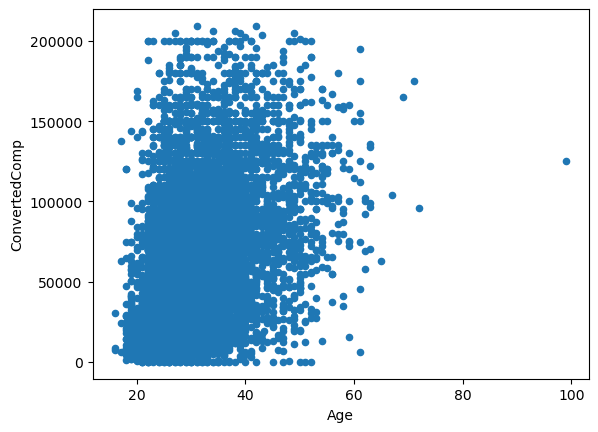

In [128]:
df_new.plot(kind = 'scatter', x = 'Age', y = 'ConvertedComp')


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

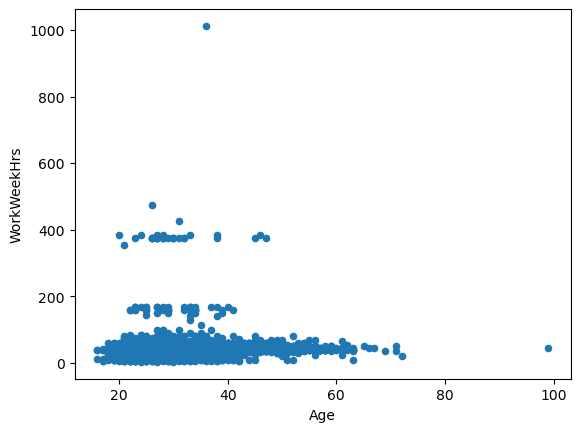

In [130]:
df_new.plot(kind="scatter", x='Age', y='WorkWeekHrs')
#Outliers are also skewing this data - do not accept any hours greater than 90


In [135]:
#Outliers are also skewing this data - do not accept any hours greater than 90outliers_WWH = df_new[(df_new['WorkWeekHrs'] > 98)]
[row,col] = outliers_WWH.shape
print("Number of outliers: ", row)

Number of outliers:  86


In [136]:
df_new2 = df_new.drop(outliers_WWH.index)

In [137]:
df_new2.shape

(10433, 85)

In [138]:
df_new.shape

(10519, 85)

<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

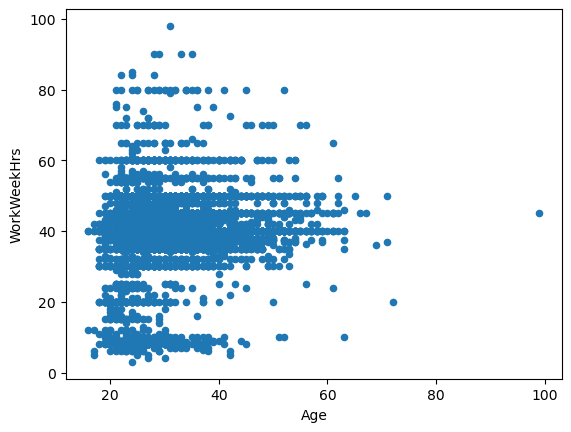

In [139]:
df_new2.plot(kind="scatter", x='Age', y='WorkWeekHrs')


In [144]:
#now to compute correlation
df_new2['Age'].corr(df_new2['WorkWeekHrs'], method = 'pearson')

0.11561789351369346

In [145]:
#now to compute correlation
#df_new2['WorkWeekHrs'].corr(df_new2['Age'], method = 'pearson')

0.11561789351369345

In [146]:
df_new2['Age'].corr(df_new2['WorkWeekHrs'], method = 'kendall')

0.05798255097459933

In [147]:
df_new2['Age'].corr(df_new2['WorkWeekHrs'], method = 'spearman')

0.0780352909546612

<h3> Correlation with Salary </h3>

In [150]:
df_new['Age'].corr(df_new['ConvertedComp'], method = 'pearson')

0.401821399712221

In [151]:
# Looks like quiz wants me to do this
df_new['Age'].corr(df_new['WorkWeekHrs'], method = 'pearson')

0.03745216846555529

In [152]:
df_new['Age'].corr(df_new['Respondent'], method = 'pearson')

0.003949835886746149

In [153]:
df_new['Age'].corr(df_new['CompTotal'], method = 'pearson')

0.006371029965269485

In [155]:
df_new['Age'].corr(df_new['CodeRevHrs'], method = 'pearson')

-0.017960816047494166

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
